Задачи:

1)Собрать данные о продажах квартир в Перми (район, цена,
этаж, площадь, кол-во комнат) с сайта avito.

2)Найти топ-5 самых дорогих, дешевых квартир.

3)Разделить квартиры на группы по районам, кол-во комнату,
этажам. Рассчитать кол-во квартир и среднюю цену в
каждой группе. Оценить, где самые дорогие/дешевые
квартиры.

4)Построить гистограмму, ящик с усами для различных групп.
Оценить самую популярную площадь, район, кол-во
комнат.

In [ ]:
!pip install selenium

In [1]:
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
import pandas as pd
import time

browser = Chrome('chromedriver.exe')

In [11]:
apart = pd.DataFrame(columns=['room','price','district', 'floor', 'square'])

In [12]:
#парсинг данных по квартирам г.Перми с сайта Авито

selector = '.iva-item-body-NPl6W'
for x in range(1,11):
    print('page ', x)
    time.sleep(1)
    browser.get('https://www.avito.ru/perm/kvartiry/prodam-ASgBAgICAUSSA8YQ?cd=1&p='+str(x))
    page = BeautifulSoup(browser.page_source, 'html.parser')
    #print(page.select(selector))
    for item in page.select(selector):
        room, square, floor = str.split(item.select('.title-root-395AQ')[0].text.strip(), ', ')
        
        price = item.select('.price-text-1HrJ_')[0].text.strip()
        #print(price)
        if item.select('.geo-georeferences-3or5Q'):
            district = item.select('.geo-georeferences-3or5Q')[0].text.strip()
        else:
            district = None
        #print(district)
        
        item = {'room':room, 'floor':floor, 'square':square, 'price':price, 'district':district}
        apart.loc[len(apart)] = item

page  1
page  2
page  3
page  4
page  5
page  6
page  7
page  8
page  9
page  10


In [13]:
apart

,room,price,district,floor,square
0,1-к квартира,1 799 900 ₽,р-н Орджоникидзевский,7/9 эт.,34.6 м²
1,1-к квартира,2 044 110 ₽,р-н Мотовилихинский,6/9 эт.,36.6 м²
2,1-к квартира,1 721 560 ₽,р-н Мотовилихинский,5/9 эт.,30.9 м²
3,3-к квартира,6 500 000 ₽,р-н Дзержинский,25/26 эт.,110 м²
4,2-к квартира,5 300 000 ₽,р-н Дзержинский,16/16 эт.,74.4 м²
...,...,...,...,...,...
558,1-к квартира,1 680 000 ₽,р-н Орджоникидзевский,2/5 эт.,34 м²
559,3-к квартира,2 800 000 ₽,р-н Свердловский,8/9 эт.,68.5 м²
560,2-к квартира,2 800 000 ₽,р-н Мотовилихинский,2/5 эт.,54 м²
561,2-к квартира,3 200 000 ₽,р-н Ленинский,3/5 эт.,63.6 м²


In [14]:
apart['price'] = apart.price.str.replace(' ', '')
apart['price'] = apart.price.str.replace('([^0-9]+)', '')
apart['price'] = apart['price'].astype(float)
apart.head()

,room,price,district,floor,square
0,1-к квартира,1799900.0,р-н Орджоникидзевский,7/9 эт.,34.6 м²
1,1-к квартира,2044110.0,р-н Мотовилихинский,6/9 эт.,36.6 м²
2,1-к квартира,1721560.0,р-н Мотовилихинский,5/9 эт.,30.9 м²
3,3-к квартира,6500000.0,р-н Дзержинский,25/26 эт.,110 м²
4,2-к квартира,5300000.0,р-н Дзержинский,16/16 эт.,74.4 м²


In [15]:
apart['square'] = apart.square.str.replace(' м²', '')
apart['square'] = apart.square.str.replace(' ', '')
apart['square'] = apart['square'].astype(float)

apart.head()

,room,price,district,floor,square
0,1-к квартира,1799900.0,р-н Орджоникидзевский,7/9 эт.,34.6
1,1-к квартира,2044110.0,р-н Мотовилихинский,6/9 эт.,36.6
2,1-к квартира,1721560.0,р-н Мотовилихинский,5/9 эт.,30.9
3,3-к квартира,6500000.0,р-н Дзержинский,25/26 эт.,110.0
4,2-к квартира,5300000.0,р-н Дзержинский,16/16 эт.,74.4


In [16]:
apart = apart.drop(index=apart[apart['district'].isnull()].index)

In [17]:
apart.shape

(557, 5)

In [18]:
apart.to_csv('avito.csv', index=False)

In [19]:
apart = pd.read_csv('avito.csv')

In [20]:
apart

,room,price,district,floor,square
0,1-к квартира,1799900.0,р-н Орджоникидзевский,7/9 эт.,34.6
1,1-к квартира,2044110.0,р-н Мотовилихинский,6/9 эт.,36.6
2,1-к квартира,1721560.0,р-н Мотовилихинский,5/9 эт.,30.9
3,3-к квартира,6500000.0,р-н Дзержинский,25/26 эт.,110.0
4,2-к квартира,5300000.0,р-н Дзержинский,16/16 эт.,74.4
...,...,...,...,...,...
552,1-к квартира,1680000.0,р-н Орджоникидзевский,2/5 эт.,34.0
553,3-к квартира,2800000.0,р-н Свердловский,8/9 эт.,68.5
554,2-к квартира,2800000.0,р-н Мотовилихинский,2/5 эт.,54.0
555,2-к квартира,3200000.0,р-н Ленинский,3/5 эт.,63.6


In [21]:
apart['floor'] = apart['floor'].str.replace(' эт.', '')
floor = apart['floor'].str.split('/', expand=True)
apart['floor'] = floor.loc[:,0].astype(int)
apart['number of storeys'] = floor.loc[:,1].astype(int)
apart

,room,price,district,floor,square,number of storeys
0,1-к квартира,1799900.0,р-н Орджоникидзевский,7,34.6,9
1,1-к квартира,2044110.0,р-н Мотовилихинский,6,36.6,9
2,1-к квартира,1721560.0,р-н Мотовилихинский,5,30.9,9
3,3-к квартира,6500000.0,р-н Дзержинский,25,110.0,26
4,2-к квартира,5300000.0,р-н Дзержинский,16,74.4,16
...,...,...,...,...,...,...
552,1-к квартира,1680000.0,р-н Орджоникидзевский,2,34.0,5
553,3-к квартира,2800000.0,р-н Свердловский,8,68.5,9
554,2-к квартира,2800000.0,р-н Мотовилихинский,2,54.0,5
555,2-к квартира,3200000.0,р-н Ленинский,3,63.6,5


In [22]:
# топ-5 самых дешевых квартир

apart.sort_values(by='price').head(5)

,room,price,district,floor,square,number of storeys
319,1-к квартира,555000.0,р-н Свердловский,1,17.0,5
257,1-к квартира,680000.0,р-н Кировский,1,14.0,5
538,Квартира-студия,700000.0,р-н Орджоникидзевский,3,13.0,5
69,1-к квартира,740000.0,р-н Свердловский,1,13.0,9
96,1-к квартира,750000.0,р-н Орджоникидзевский,1,18.5,5


In [23]:
# топ-5 самых дорогих квартир

apart.sort_values(by='price', ascending=False).head(5)

,room,price,district,floor,square,number of storeys
197,5-к квартира,22000000.0,р-н Свердловский,6,200.0,6
87,Своб. планировка,16600000.0,р-н Ленинский,7,277.1,8
245,6-к квартира,16500000.0,р-н Ленинский,5,175.0,12
97,4-к квартира,15000000.0,р-н Индустриальный,14,138.0,14
503,4-к квартира,14950000.0,р-н Ленинский,7,149.0,18


In [24]:
#Разделить квартиры на группы по районам. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('district') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
district,,
р-н Ленинский,44,6170654.0
р-н Свердловский,132,4199888.0
р-н Дзержинский,78,3852595.0
р-н Индустриальный,83,3582504.0
Пермь,3,3266667.0
р-н Мотовилихинский,104,3069802.0
р-н Кировский,61,2522903.0
р-н Орджоникидзевский,52,2276554.0


In [25]:
# Разделить квартиры на группы по кол-ву комнат. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('room') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
room,,
6-к квартира,1,16500000.0
5-к квартира,3,12400000.0
Своб. планировка,9,8369000.0
3-к апартаменты,2,7990000.0
4-к квартира,29,6822440.0
3-к квартира,145,4406076.0
2-к квартира,192,3277328.0
1-к квартира,148,2401600.0
Квартира-студия,24,2126956.0


In [26]:
# Разделить квартиры на группы по этажам. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('floor') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
floor,,
19,3,8883333.0
20,3,7503333.0
22,2,6604500.0
25,2,6500000.0
24,2,5855000.0
14,16,5118381.0
13,11,5091447.0
11,10,4946305.0
23,1,4900000.0


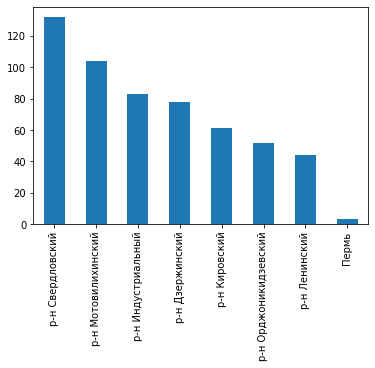

In [27]:
# Построить гистограмму по районам

apart['district'].value_counts().plot(kind='bar')

In [28]:
# самая популярный район
apart['district'].mode()

0    р-н Свердловский
dtype: object

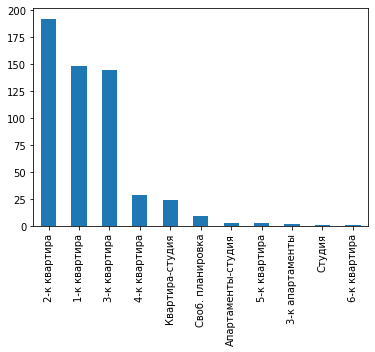

In [29]:
apart['room'].value_counts().plot(kind='bar')

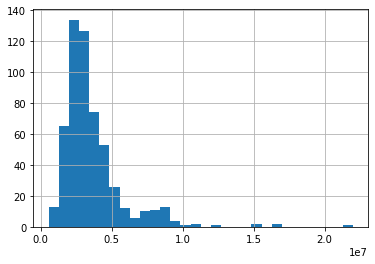

In [30]:
apart['price'].hist(bins=30)

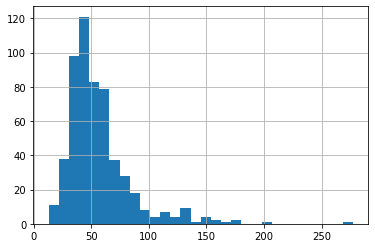

In [31]:
apart['square'].hist(bins=30)

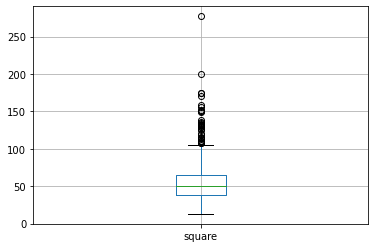

In [32]:
# ящик с усами по площади
apart.boxplot('square')

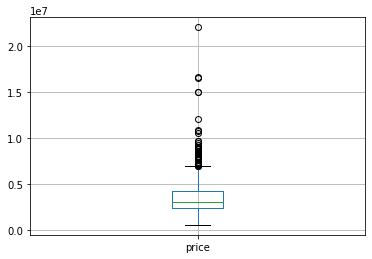

In [33]:
# ящик с усами по цене
apart.boxplot('price')


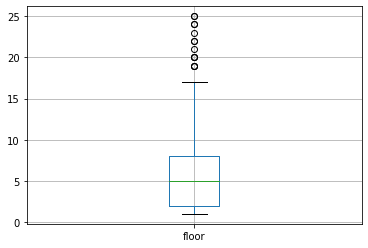

In [34]:
# ящик с усами по этажам
apart.boxplot('floor')


Populating the interactive namespace from numpy and matplotlib


C:\Users\sasha\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['floor', 'square']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


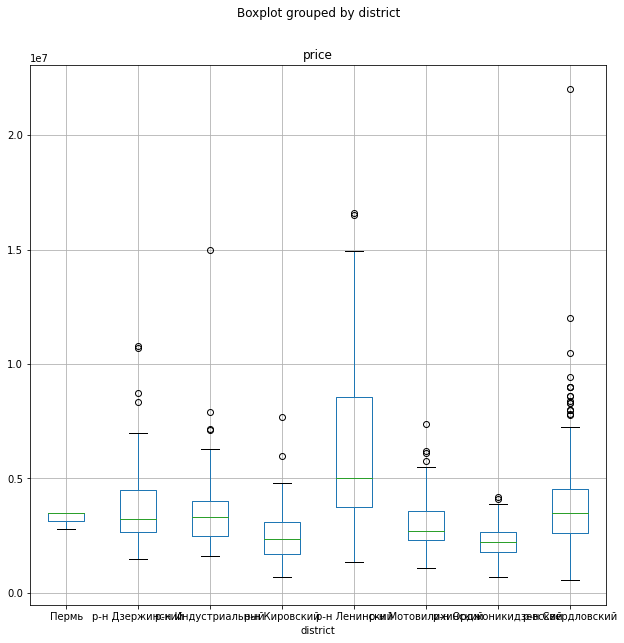

In [35]:
%pylab inline
import matplotlib.pyplot as plt

apart.boxplot(column='price',  by='district', figsize=(10,10))
plt.show()

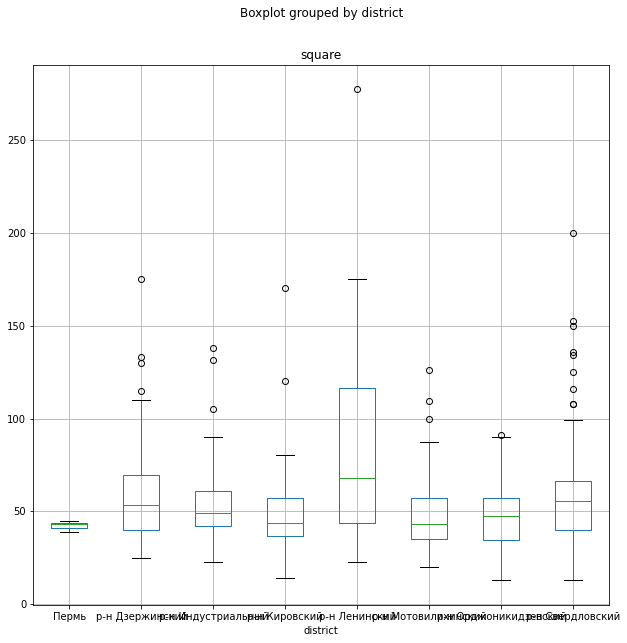

In [36]:
apart.boxplot(column='square',  by='district', figsize=(10,10))
plt.show()